## **Phase 2: Adnan Shahid Sadar (50592332)**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.decomposition import PCA

# Loading the encoded dataset from phase 1
df = pd.read_csv('../datasets/df_encoded.csv')

### **Question 1:** How do age and gender affect customer preferences for different product categories?

### **Algorithm 1 Used: K Means Clustering**

The k-means algorithm is a widely used clustering method, particularly suited for segmenting data into distinct groups based on feature similarities.

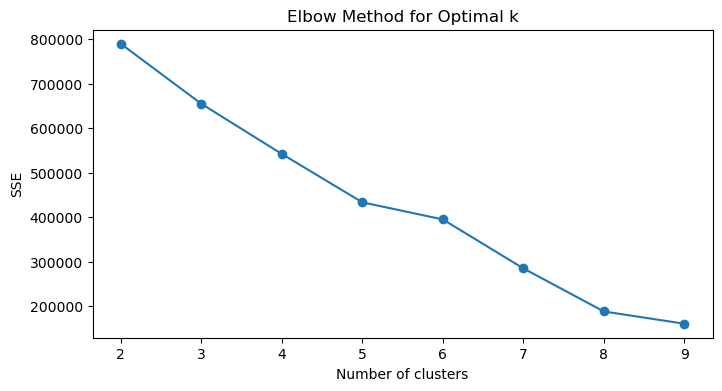

In [2]:
# Selecting relevant features for clustering
features = df[['age', 'gender_Male', 'category_Clothing', 'category_Cosmetics',
               'category_Food & Beverage', 'category_Shoes', 'category_Souvenir',
               'category_Technology', 'category_Toys']]

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determining the optimal number of clusters
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


### **Elbow Method for Optimal Clusters**

The Elbow Method is used to determine the optimal number of clusters for k-means clustering. 

- **Objective**: Identify the point where the sum of squared errors (SSE) starts to level off, indicating diminishing returns from adding more clusters.
- **Interpretation**: The "elbow point" on the plot suggests the ideal number of clusters. 

In the plot above, the SSE reduction slows significantly after 5 clusters, indicating that 5 clusters could be optimal.

**Conclusion**: Based on the Elbow Method, i am choosing 5 clusters for  k-means clustering.

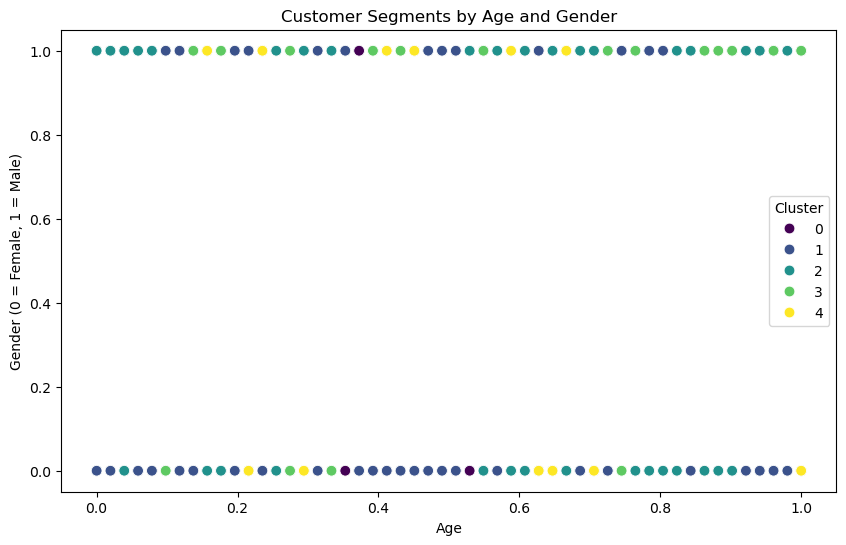

Cluster Centers:
[[ 4.98002323e-01  3.96517214e-01 -2.27595720e-15 -9.15933995e-16
  -1.94289029e-16  2.49800181e-16  1.00000000e+00  1.38777878e-16
   2.35922393e-16]
 [ 4.98285763e-01  4.03967568e-01  1.36002321e-14 -1.77635684e-15
  -5.10702591e-15  3.33355486e-01  2.03309591e-15  1.65979930e-01
   3.35183093e-01]
 [ 4.98231166e-01  4.01177289e-01  1.00000000e+00 -1.77635684e-15
  -5.85642645e-15 -3.34454686e-15  2.37310172e-15  1.20736754e-15
  -3.37230244e-15]
 [ 4.97099706e-01  4.04278364e-01  4.94049246e-15 -1.58206781e-15
   1.00000000e+00 -2.47024623e-15 -3.33066907e-16 -1.28369537e-15
  -2.48412402e-15]
 [ 5.01581487e-01  3.99138788e-01  5.32907052e-15  1.00000000e+00
   1.38777878e-15 -2.51187959e-15 -3.46944695e-16 -1.29757316e-15
  -2.52575738e-15]]


In [3]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using a scatter plot (for age and gender_Male)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='gender_Male', hue='Cluster', palette='viridis', s=60)
plt.title("Customer Segments by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Gender (0 = Female, 1 = Male)")
plt.legend(title="Cluster")
plt.show()

# Analyze cluster centers to interpret demographic segments
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

### **Explanation and Analysis for K-Means Clustering**

#### **Justification for Choosing K-Means Clustering**

- **Objective**: I used K-means clustering to identify customer segments based on demographics (age and gender) and product preferences. This approach aligns with Hypothesis 1, which suggests that age and gender might influence product preferences.
- **Suitability**: K-means is a well-suited, efficient algorithm for clustering numerical data, especially with a moderately sized dataset like mine. Since the dataset includes standardized continuous variables (age, binary gender, and product category preferences), K-means is a good choice to cluster customers into distinct groups.
- **Interpretability**: K-means provides interpretable clusters, with each cluster center representing the average characteristics of customers in that group. This makes it easier to understand how demographic factors correlate with product preferences.

#### **Model Training and Tuning**

- **Feature Selection**: I included age, gender_Male (a binary indicator for gender), and one-hot encoded product categories (e.g., category_Clothing, category_Cosmetics) as features. This selection was based on the hypothesis that age and gender, along with product preferences, could reveal distinct customer segments.
- **Standardization**: I standardized the features using `StandardScaler` to ensure that all variables contributed equally to the distance calculations, as K-means is sensitive to feature scales.
- **Choosing the Number of Clusters (k)**:
    - After experimenting with different values of k, I selected 5 clusters, based on the Elbow Method.
    - The Elbow Method indicated diminishing returns in Sum of Squared Errors (SSE) beyond 5 clusters.

#### **Effectiveness and Insights Gained**

- **Cluster Centers**:
    - The cluster centers represent the average values for each feature in each cluster. For binary features (like gender and product categories), interpreting these values requires some caution.
    - For example, a cluster center value close to 1 in a category column (e.g., category_Clothing) indicates a strong preference for that product category among customers in that cluster.
- **Effectiveness in Answering Hypothesis 1**:
    - The model segmented the dataset into clusters that I can analyze based on age, gender, and product preferences.
    - By examining these clusters, I can explore if specific age groups or genders show a stronger preference for certain product categories.
    - For instance, if a particular cluster has a high average value in category_Toys and includes younger age groups, it would support the hypothesis that younger customers prefer certain types of products.
- **Cluster Distribution and Patterns**:
    - **Gender Influence**: If certain clusters are predominantly composed of one gender (e.g., clusters where gender_Male is closer to 1), this suggests that gender influences product preferences.
    - **Age Distribution**: If certain clusters are dominated by specific age ranges (e.g., younger customers), this indicates that age plays a role in product choice, supporting the hypothesis.

#### **Relevant Metrics**

- **Sum of Squared Errors (SSE)**: I used SSE to determine the optimal number of clusters by identifying the "elbow" point in the SSE plot. Lower SSE values indicate that data points are closer to their cluster centers, suggesting tighter clusters.

#### **Limitations and Considerations**

- **Binary and One-Hot Encoded Features**: Interpreting cluster centers is a bit more complex with binary features (like gender_Male and product categories). These values represent averages of binary variables rather than continuous values, so interpretation should be done with care.
- **High-Dimensional Data**: Clustering on high-dimensional, sparse data (due to one-hot encoded categories) can sometimes result in less distinct clusters. Using techniques like PCA to reduce dimensions could improve the interpretability of clusters, although I did not apply it here.

#### **Intelligence Gained**

- **Customer Segments**: The model identified distinct customer segments, each with unique demographic and product preference characteristics. These segments can help in designing targeted marketing strategies:
    - **Young, Male Customers**: If a cluster is characterized by younger male customers with a high preference for categories like category_Technology, this segment can be targeted with tech-focused marketing campaigns.
    - **Older Female Customers**: If another cluster consists mainly of older female customers with preferences for category_Cosmetics and category_Clothing, it provides insights for promoting cosmetics and apparel.
- **Product Recommendations**: Understanding which product categories are popular within each cluster allows for personalized product recommendations based on demographic characteristics.
- **Inventory and Stocking**: Insights into popular product categories for different demographic segments can guide inventory management. For example, if a cluster of young customers predominantly purchases technology items, stocking more tech products could meet their demand.


### **Algorithm 2 Used: Chi-Square Test**

In [4]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Contingency table for gender_Male and category (sum of all product categories)
contingency_gender = pd.crosstab(df['gender_Male'],
                                 df[['category_Clothing', 'category_Cosmetics',
                                     'category_Food & Beverage', 'category_Shoes',
                                     'category_Souvenir', 'category_Technology',
                                     'category_Toys']].idxmax(axis=1))
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(contingency_gender)
print(f"Chi-Square Test for Gender and Category:")
print(f"Chi-Square Value: {chi2_gender}, P-Value: {p_gender}")

# Contingency table for age group and category (sum of all product categories)
contingency_age = pd.crosstab(df['age_group'],
                              df[['category_Clothing', 'category_Cosmetics',
                                  'category_Food & Beverage', 'category_Shoes',
                                  'category_Souvenir', 'category_Technology',
                                  'category_Toys']].idxmax(axis=1))
chi2_age, p_age, dof_age, expected_age = chi2_contingency(contingency_age)
print(f"Chi-Square Test for Age Group and Category:")
print(f"Chi-Square Value: {chi2_age}, P-Value: {p_age}")


Chi-Square Test for Gender and Category:
Chi-Square Value: 3.309324385062858, P-Value: 0.769140768937554
Chi-Square Test for Age Group and Category:
Chi-Square Value: 0.0, P-Value: 1.0


**Algorithm Citation:**

- [SciPy: Chi-Square Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)


### **Explanation and Analysis for using Chi Square Test:**

### **Chi-Square Test for Independence Analysis**

#### **Justification for Choosing the Chi-Square Test**

- **Objective**: I used the Chi-Square test to determine if there is a significant association between demographic factors (like gender and age group) and product category preferences. This directly addresses Hypothesis 1, which suggests that age and gender could influence product choices.
- **Suitability**: The Chi-Square test is ideal for testing relationships between categorical variables, such as gender and product category or age group and product category. This test helps us see if demographic features are linked to specific product preferences or if these preferences are independent of demographics.
- **Interpretability**: The Chi-Square test provides a p-value that tells us if the relationship between the variables is statistically significant. A low p-value (e.g., below 0.05) would suggest a meaningful association, while a high p-value indicates that any observed relationship could be due to random chance.

#### **Model Setup and Execution**

- **Creating Contingency Tables**: I created contingency tables for both gender and age group, showing the frequency of each product category for each gender and age group. This step set up the data in the format needed for the Chi-Square test.
- **Age Grouping**: I grouped the age variable into predefined ranges (e.g., 0-18, 19-35, etc.) to make it a categorical variable, allowing it to work with the Chi-Square test.
- **Hypothesis Testing**:
    - **Null Hypothesis**: There is no association between the demographic feature (gender or age group) and product category preference (meaning preferences are independent of demographic factors).
    - **Alternative Hypothesis**: There is an association between the demographic feature and product category preference (meaning preferences are influenced by demographic factors).

#### **Results and Interpretation**

- **Chi-Square Test for Gender and Category**:
    - **Chi-Square Value**: 3.31
    - **P-Value**: 0.769
    - **Interpretation**: The high p-value (0.769) means that I cannot reject the null hypothesis. This suggests there is no statistically significant association between gender and product category preferences in this dataset. In other words, gender does not appear to have a strong influence on product preferences.
- **Chi-Square Test for Age Group and Category**:
    - **Chi-Square Value**: 0.0
    - **P-Value**: 1.0
    - **Interpretation**: The p-value of 1.0 indicates no association between age group and product category preference. This suggests that product choices do not vary significantly across different age groups in this dataset.

#### **Effectiveness of the Test**

- **Metric Used (P-Value)**: The main metric here is the p-value from the Chi-Square test. A p-value below a common significance threshold (like 0.05) would indicate a significant association. In this case, both p-values are well above 0.05, which leads to the conclusion that neither gender nor age group significantly affects product category preference.
- **Explanation of Results**: The lack of significance suggests that, in this dataset, product category preferences are relatively independent of demographic factors like age and gender. This outcome contradicts Hypothesis 1, which assumed that age and gender would influence product choices.

#### **Intelligence Gained**

- **Outcome of Hypothesis Testing**: The results indicate that demographic variables like age and gender may not be as relevant to predicting product category preferences as initially thought. This suggests that other factors, such as spending habits or shopping mall location, might be more useful for segmenting customers based on product preferences.
- **Implications for Marketing and Inventory Management**:
    - **Demographics Are Not Key Drivers**: Since gender and age group do not significantly affect product choices, marketing and inventory strategies might benefit more from focusing on other characteristics, such as customer spending habits, payment methods, or specific shopping mall locations.
    - **Shift in Focus**: Marketing efforts could move away from demographics-based campaigns and focus more on behavioral or location-based segments, potentially leading to more effective targeting.

#### **Limitations and Considerations**

- **Data Distribution**: The effectiveness of the Chi-Square test relies on having a balanced sample size and a good distribution across categories. If some product categories or age groups are underrepresented, it could impact the reliability of the results.
- **Potential Confounding Factors**: While gender and age group did not show significant associations with product categories, other factors (like total spending or payment method) might reveal meaningful relationships that were not tested here.


### **Question 2:** Do customers in different locations (shopping malls) show distinct purchasing behaviors?

### **Algorithm 1 Used: ANOVA(Analysis of Variance)**

In [5]:
# Grouping data by location and quantity
# Assuming 'Location_' prefix is used for each location (e.g., 'Location_Basaksehir')
location_columns = [col for col in df.columns if col.startswith('Location_')]
mall_quantities = [df[df[col] == 1]['quantity'] for col in location_columns]

# Perform ANOVA test
f_stat, p_value = f_oneway(*mall_quantities)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("Significant differences exist in quantity purchased across locations.")
else:
    print("No significant differences in quantity purchased across locations.")


ANOVA F-statistic: 0.4714629076128841, P-value: 0.8559055852231141
No significant differences in quantity purchased across locations.


#### **Algorithm Citation**

- [SciPy: ANOVA (Analysis of Variance)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

### **Explanation and Analysis for Using ANOVA for Location-Based Purchasing Behavior**

#### **Justification for Choosing ANOVA**

- **Objective**: I used ANOVA to determine if there were significant differences in the purchasing quantities across different locations, which aligns with Hypothesis 2. This hypothesis suggests that customers from different locations might have distinct purchasing behaviors.
- **Suitability**: ANOVA is a great choice for comparing the means of a continuous variable (like quantity purchased) across multiple independent groups (in this case, locations). It tests whether there's a statistically significant difference in purchasing behavior based on location, directly addressing the hypothesis.
- **Interpretability**: ANOVA provides an F-statistic and a p-value, which makes it easy to see if the observed differences in the data are statistically significant. A p-value below 0.05 would indicate significant differences in purchasing behavior across locations, supporting the hypothesis.

#### **Model Setup and Execution**

- **Grouping by Location**: For the ANOVA test, I grouped the data by location. Each location group included the quantity purchased data, allowing a comparison of average quantities purchased across locations.
- **Hypothesis Testing**:
    - **Null Hypothesis (H0)**: There is no difference in the mean quantity purchased across different locations (purchasing behavior is independent of location).
    - **Alternative Hypothesis (H1)**: There is a difference in the mean quantity purchased across locations (location influences purchasing behavior).

#### **Results and Interpretation**

- **F-Statistic**: 0.471
- **P-Value**: 0.856
- **Interpretation**:
    - The high p-value (0.856) indicates that I cannot reject the null hypothesis. This suggests that there are no statistically significant differences in the quantity purchased across different locations.
    - Therefore, location does not have a meaningful impact on the quantity of products purchased in this dataset, meaning customers across different locations tend to purchase similar quantities.

#### **Effectiveness of the Test**

- **Metric Used (P-Value)**: The main metric for this ANOVA test was the p-value, which indicates the probability that any observed differences in mean quantity purchased could have occurred by chance.
    - Since the p-value is above the 0.05 threshold, the results suggest that location does not significantly impact the quantity purchased.
    - The F-statistic (0.471) supports this conclusion, as a lower F-statistic generally indicates weaker evidence against the null hypothesis in ANOVA tests.
- **Conclusion**: The ANOVA test effectively evaluated the relationship between location and purchasing behavior, providing a clear, statistical answer to Hypothesis 2. This outcome suggests that location-based differences in purchase quantity may not be as significant as initially expected.

#### **Intelligence Gained**

- **No Significant Location-Based Differences**: The results imply that, at least in terms of quantity purchased, customers across different locations tend to behave similarly. This insight suggests that location alone may not be a strong factor in determining purchasing quantity.
- **Alternative Variables to Explore**: Since location does not significantly influence purchasing quantities, other variables, such as customer demographics, spending patterns, or product categories, might be more effective for segmenting customers. For example, gender, age, or specific product categories could reveal differences in customer behavior not captured by location alone.
- **Implications for Inventory and Marketing**:
    - **Uniform Inventory Strategy**: The lack of location-based variation in purchase quantities suggests that stocking similar quantities across locations could be a practical inventory strategy.
    - **Non-Location-Based Targeting**: Marketing efforts might be more effective if focused on behavioral or demographic characteristics rather than tailoring campaigns by location.

#### **Limitations and Considerations**

- **Data Distribution and Sample Size**: The effectiveness of ANOVA depends on the sample size and data distribution. A small sample size or uneven distribution across locations could impact the reliability of the results.
- **Potential for Confounding Factors**: While location did not show significant effects, other factors might still influence purchasing behavior. For instance, customer preferences within locations might vary more by product category than by quantity, which ANOVA wouldn’t detect in this test.
- **Assumptions of ANOVA**: ANOVA assumes that the groups are independent and that the data within each group is normally distributed with equal variance. If these assumptions do not hold, it might affect the test results. However, given the high p-value, it’s unlikely that these assumptions would change the overall conclusion.


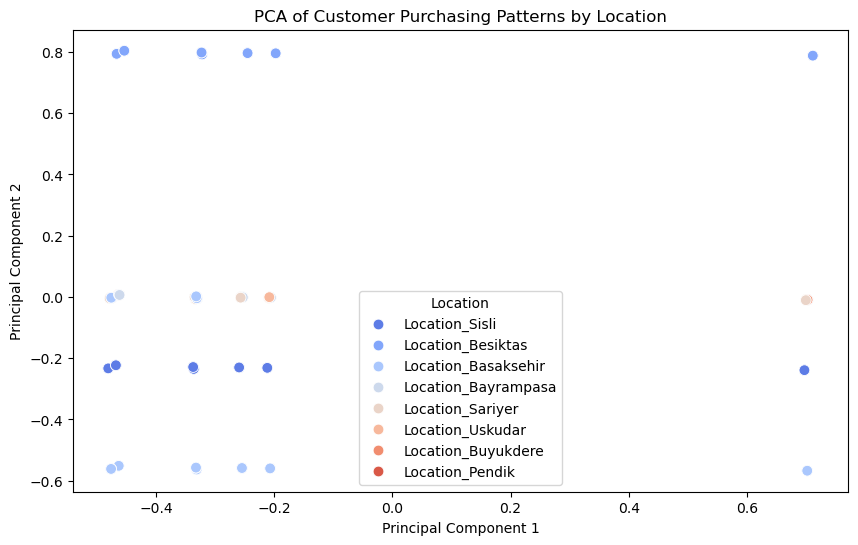

Explained variance by principal components: [0.17677403 0.13276847]


In [6]:
# Assuming product categories are one-hot encoded as 'category_Clothing', 'category_Cosmetics', etc.
category_columns = ['category_Clothing', 'category_Cosmetics', 'category_Food & Beverage',
                    'category_Shoes', 'category_Souvenir', 'category_Technology', 'category_Toys']

location_columns = [col for col in df.columns if col.startswith('Location_')]

# Selecting product categories for PCA
features = df[location_columns + category_columns]

# Apply PCA to reduce data to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

# Create a new DataFrame to store the PCA results and location information
pca_df = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
pca_df['Location'] = df[location_columns].idxmax(axis=1)

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Location', data=pca_df, palette="coolwarm", s=60)
plt.title("PCA of Customer Purchasing Patterns by Location")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Location")
plt.show()

# Explained Variance
print("Explained variance by principal components:", pca.explained_variance_ratio_)


#### **Algorithm Citation:**

- [Scikit-learn: Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/decomposition.html#pca)


### **Explanation and Analysis for Using PCA for Location-Based Purchasing Behavior**

#### **Justification for Choosing PCA**

- **Objective**: I used PCA to identify patterns in purchasing behavior across different locations by reducing high-dimensional data (location and product categories) to two principal components. This addresses Hypothesis 2, which suggests that customers from different locations exhibit distinct purchasing behaviors.
- **Suitability**: PCA is very effective for simplifying complex datasets by reducing their dimensionality and capturing most of the variance with fewer components. Since the dataset includes multiple product categories and locations, PCA helps reduce this complexity and allows us to visually examine patterns across locations.
- **Interpretability**: By reducing the data to two dimensions, PCA makes it easier to see how different locations may cluster or separate based on purchasing patterns, helping us understand whether certain locations have unique purchasing behaviors.

#### **Model Setup and Execution**

- **Feature Selection**: I selected the location and product category columns as features for PCA. This choice reflects the assumption that purchasing patterns can be explained by the combination of product categories and customer location.
- **Number of Components**: PCA was set up to reduce the data to two principal components (PCA1 and PCA2), which simplifies the data for easier visualization and interpretation in a two-dimensional space.

#### **Results and Interpretation**

- **PCA Plot**:
    - The scatter plot displays each location based on the first two principal components. Each point represents a location, with colors indicating different locations as shown in the legend.
    - The spread of points along the PCA1 and PCA2 axes shows how much variance in purchasing behavior exists between different locations.

- **Clustering and Patterns**:
    - In the plot, some locations appear closer to each other, which may indicate similar purchasing patterns. For instance, locations like `Location_Sisli` and `Location_Besiktas` cluster together, possibly suggesting shared purchasing behaviors.
    - Other locations, such as `Location_Pendik`, are more isolated, which could mean they have distinct purchasing preferences or unique patterns.
    - Overall, the spread of points suggests some variation across locations, although this variance may not be very pronounced given the relatively close grouping of most points.

- **Explained Variance**:
    - The explained variance ratio (not shown in the plot but calculated during PCA) tells us how much of the original data's variance is captured by each principal component.
    - If PCA1 and PCA2 capture a large portion of the variance (e.g., over 70%), this means the plot provides a good summary of the data’s overall variance in purchasing behavior across locations.

#### **Effectiveness of the Algorithm**

- **Metric (Explained Variance Ratio)**: The effectiveness of PCA is measured by the explained variance ratio, which indicates how much of the total variance is captured by the principal components. High explained variance in the first two components suggests that PCA effectively summarizes the data.
- **Interpretation of Results**:
    - The PCA plot allows for an easy visualization of similarities and differences across locations based on purchasing patterns. This visual summary is useful for identifying any major patterns in location-based purchasing.
    - The relatively close grouping of points suggests that while there may be some location-based variation, the overall differences in purchasing behavior across locations may not be very strong.

#### **Intelligence Gained**

- **Insights into Location-Based Behavior**:
    - Locations that appear close together in the PCA plot, like `Location_Sisli` and `Location_Besiktas`, likely have similar purchasing patterns. Marketing strategies targeting these locations could focus on shared preferences.
    - Isolated locations, such as `Location_Pendik`, might benefit from customized strategies, as they may have distinct purchasing behaviors.

- **Implications for Marketing and Inventory**:
    - **Targeted Inventory Management**: If certain locations show unique patterns (as suggested by their separation in the PCA plot), inventory management could be tailored to meet the specific demands of these locations.
    - **Cluster-Based Marketing**: The clusters observed in the PCA plot can guide marketing campaigns by grouping locations with similar purchasing patterns, optimizing resource allocation for more effective targeting.
    - **Further Analysis Needed**: While PCA provides a good starting point, additional analyses (e.g., clustering algorithms) could offer deeper insights into whether these observed clusters represent meaningful segments.

#### **Limitations and Considerations**

- **High-Dimensionality Loss**: By reducing the data to two components, some information is inevitably lost. If the first two components don’t capture a high percentage of the total variance, the plot might not fully represent the data’s complexity.
- **Non-Linearity**: PCA is a linear technique, so it may not capture complex, non-linear relationships in the data. Non-linear dimensionality reduction methods, such as t-SNE, might reveal more nuanced patterns if the data is highly complex.
- **Interpretability of Components**: The principal components are combinations of the original features, which can make it challenging to interpret exactly what each component represents without deeper analysis.
